## Observations and Insights

## Dependencies and starter code

In [1]:
#Magic function notebook
%matplotlib notebook

#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
#pull only only pertinant data
tumor_vol = all_data[['Drug Regimen','Tumor Volume (mm3)']]
#group data by regimen
drug_group = tumor_vol.groupby('Drug Regimen')
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mean of tumor volume
drug_mean = drug_group.mean()
#median
drug_median = drug_group.median()
#variance
drug_variance = drug_group.var()
#standard deviation
drug_std = drug_group.std()
#SEM
drug_sem = drug_group.sem()

In [3]:
#merge first to tables to start df
sum_df = pd.merge(drug_mean, drug_median, on='Drug Regimen')
#rename columns to stop renaming issues later
sum_df = sum_df.rename(columns = {"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median"})
#add variance to df
sum_df = pd.merge(sum_df, drug_variance, on='Drug Regimen')
#add standard deviation to df
sum_df = pd.merge(sum_df, drug_std, on='Drug Regimen')
#add SEM to df
sum_df = pd.merge(sum_df, drug_sem, on='Drug Regimen')
#rename remaining columns
sum_df = sum_df.rename(columns = {'Tumor Volume (mm3)_x': 'Variance', 'Tumor Volume (mm3)_y': 'Std Dev', 'Tumor Volume (mm3)': 'SEM'})
#print df
sum_df = sum_df.round(decimals=3)
sum_df = sum_df.reset_index()
sum_df

,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.323,50.855,42.351,6.508,0.513
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


## Bar plots

<IPython.core.display.Javascript object>


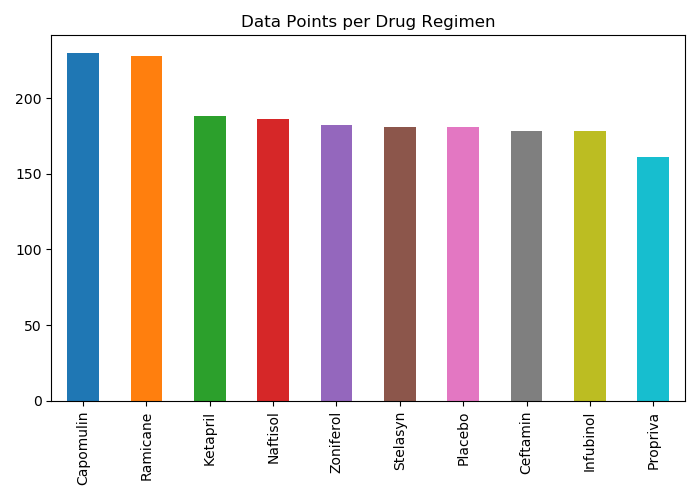

In [22]:
#Generate a bar plot showing number of data points for each treatment regimen using pandas
#p1
#Get a count of data points per drug regimen
drug_count_p1 = all_data['Drug Regimen'].value_counts()
#set graph colors
colors_p1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#create the bar chart using pandas
chart_p1 = drug_count_p1.plot(kind='bar', figsize=(7,5), color=colors_p1, title='Data Points per Drug Regimen')

In [24]:
plt.tight_layout()
plt.savefig('points_pandas.png')

In [18]:
#Generate a bar plot showing number of data points for each treatment regimen using pyplot
#p2
name_p2 = all_data['Drug Regimen'].unique()
count_p2 = all_data['Drug Regimen'].value_counts()
x_axis_p2 = np.arange(len(count_p2))
colors_p2 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
chart_p2 = plt.bar(x_axis_p2, count_p2, color=colors_p2, align='center')

In [19]:
tick_locations_p2 = [value for value in x_axis_p2]
plt.xticks(tick_locations_p2, name_p2, rotation=90)
plt.xlim(-0.75, len(x_axis_p2)-0.25)
plt.ylim(0, max(count_p2)+20)
plt.title('Data Points per Drug Regimen')

Text(0.5, 1, 'Data Points per Drug Regimen')

In [20]:
plt.tight_layout()
plt.savefig('points_pplot.png')

## Pie plots

In [ ]:
#Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen